# Question 1-3


## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture


### Plotter for ellipse

In [2]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    clusters = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=clusters, s=10, cmap='viridis')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=10)
    
    w_factor = 0.4 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    return clusters

### Piechart plotter


In [3]:
def pieplotter(labels, sizes):
    plt.figure(num=None, figsize=(6, 4), dpi=150, facecolor='c', edgecolor='k')
    
    colors = ['lightcoral','gold', 'yellowgreen','lightskyblue', 'red','blue']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, 100*s/sum(sizes)) for l, s in zip(labels, sizes)])
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

### Reading the data set

In [4]:
dataSet = pd.read_csv("./../output_data/q-1-1_a_linear.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [5]:
K = 5

### GMM object creatition

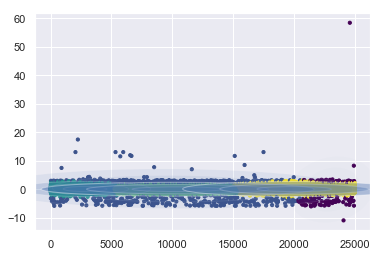

In [6]:
gmm = GaussianMixture(n_components = K, covariance_type='full', max_iter = 1000, random_state=42)
clusters = plot_gmm(gmm, X[:,0:2])

### Fitting the gmm object

In [7]:
clusters = gmm.fit(X).predict(X)
clusters

array([4, 4, 4, ..., 2, 3, 4])

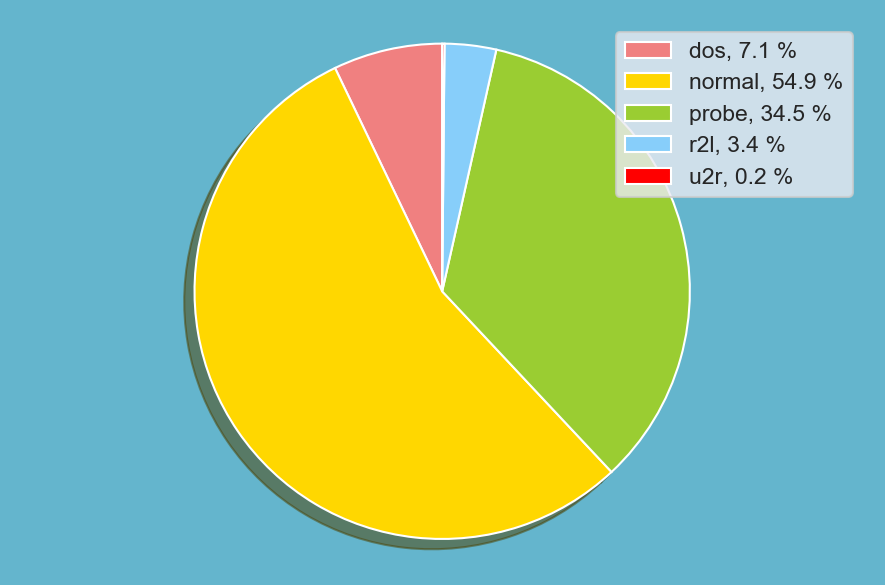

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 142 1094  688   67    3]


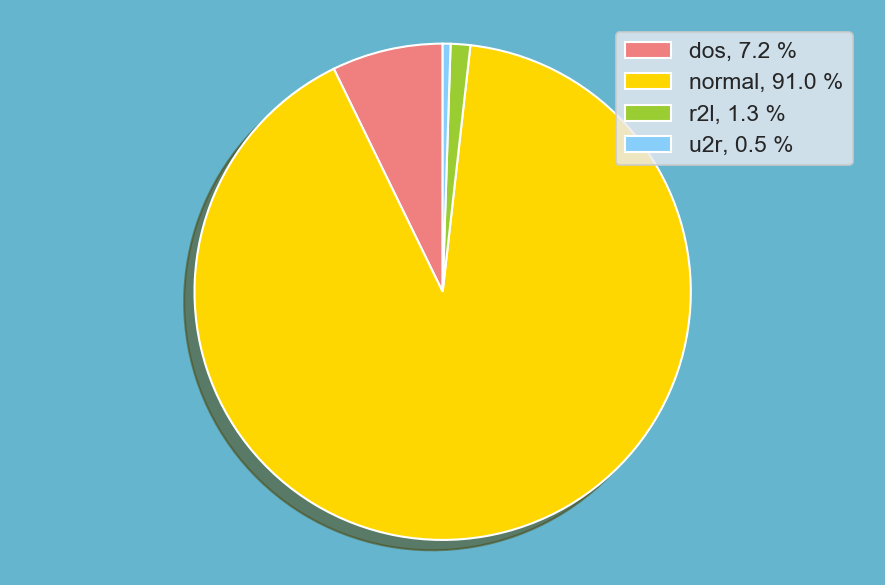

1 ['dos' 'normal' 'r2l' 'u2r'] [  85 1070   15    6]


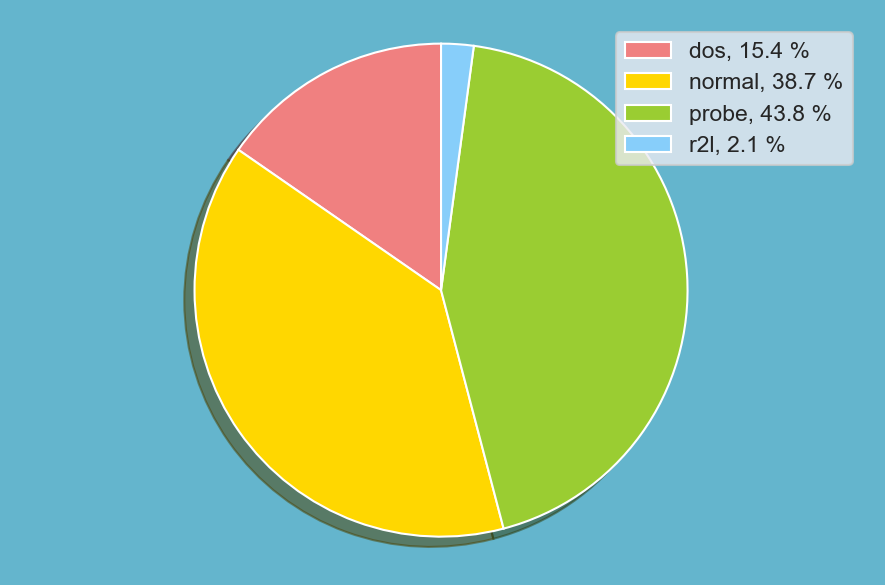

2 ['dos' 'normal' 'probe' 'r2l'] [ 94 237 268  13]


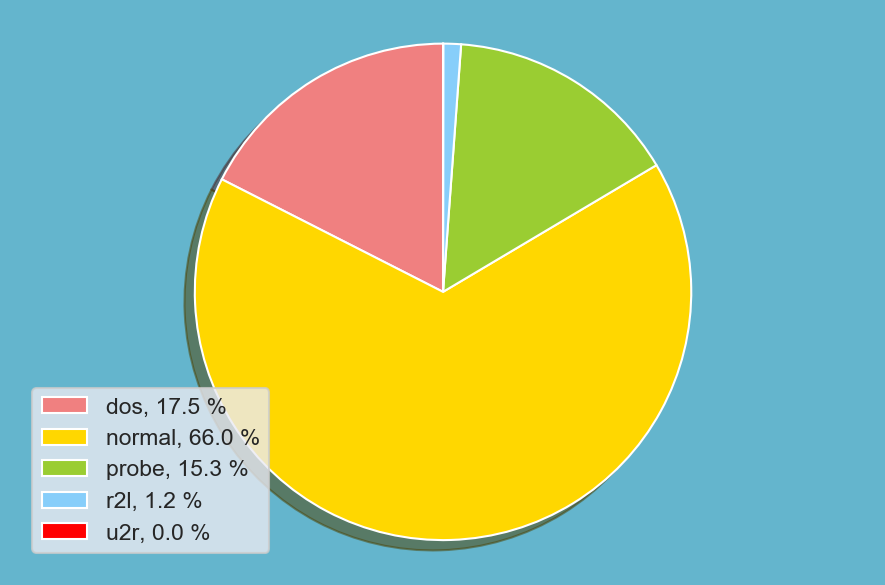

3 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1552 5852 1357  102    1]


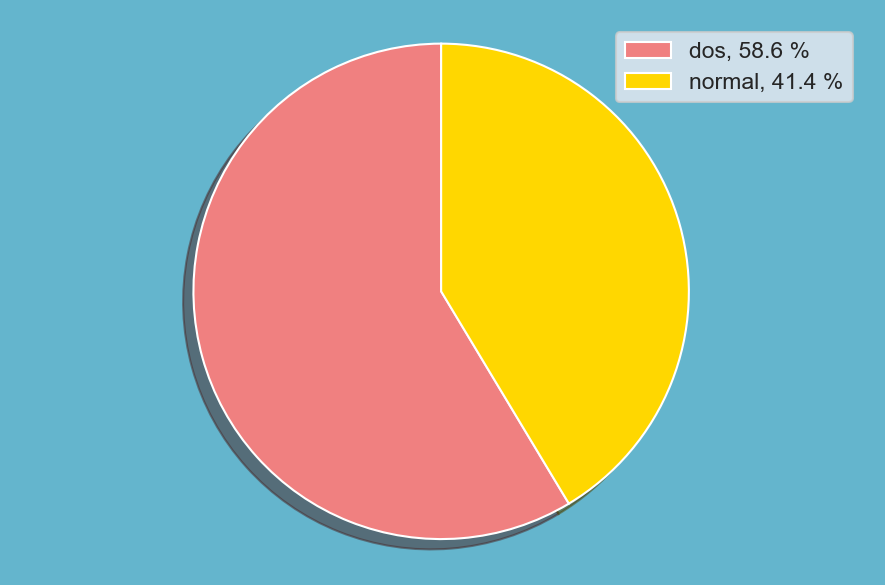

4 ['dos' 'normal'] [7241 5111]


0.6210496839747179

In [8]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [9]:
dataSet = pd.read_csv("./../output_data/q-1-1_b_sigmoid.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [10]:
K = 5

### GMM object creatition

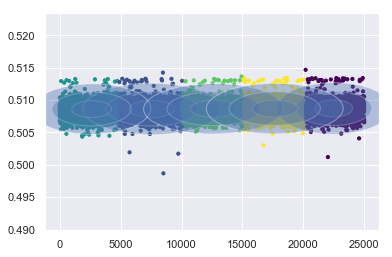

In [11]:
gmm = GaussianMixture(n_components = K, covariance_type='full', max_iter = 1000, random_state=42)
clusters = plot_gmm(gmm, X[:,0:2])

### Fitting the gmm object

In [12]:
clusters = gmm.fit(X).predict(X)
clusters

array([4, 3, 4, ..., 1, 3, 4])

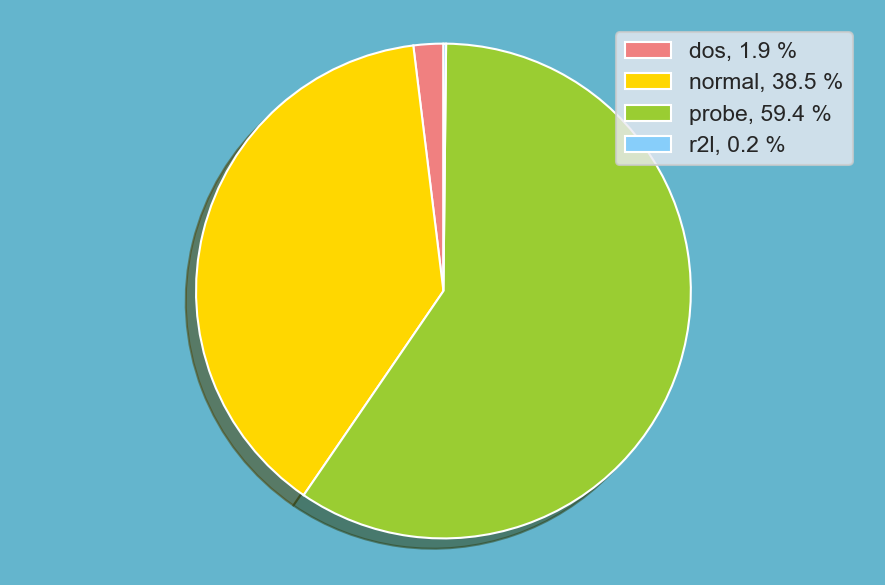

0 ['dos' 'normal' 'probe' 'r2l'] [  34  673 1038    3]


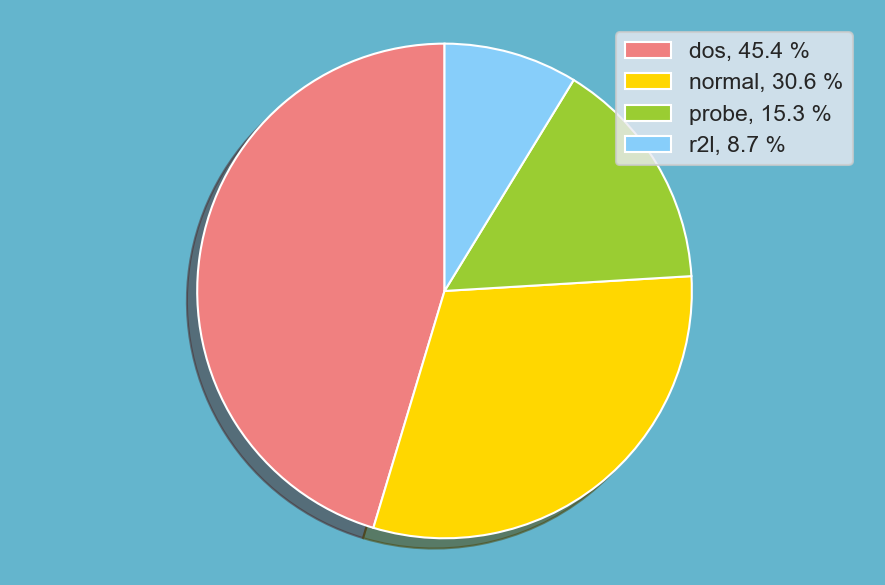

1 ['dos' 'normal' 'probe' 'r2l'] [332 224 112  64]


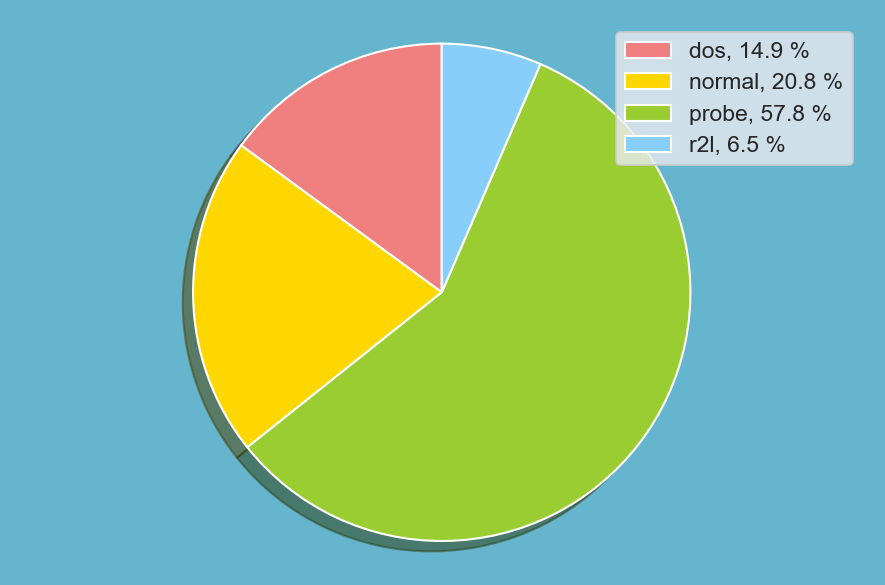

2 ['dos' 'normal' 'probe' 'r2l'] [23 32 89 10]


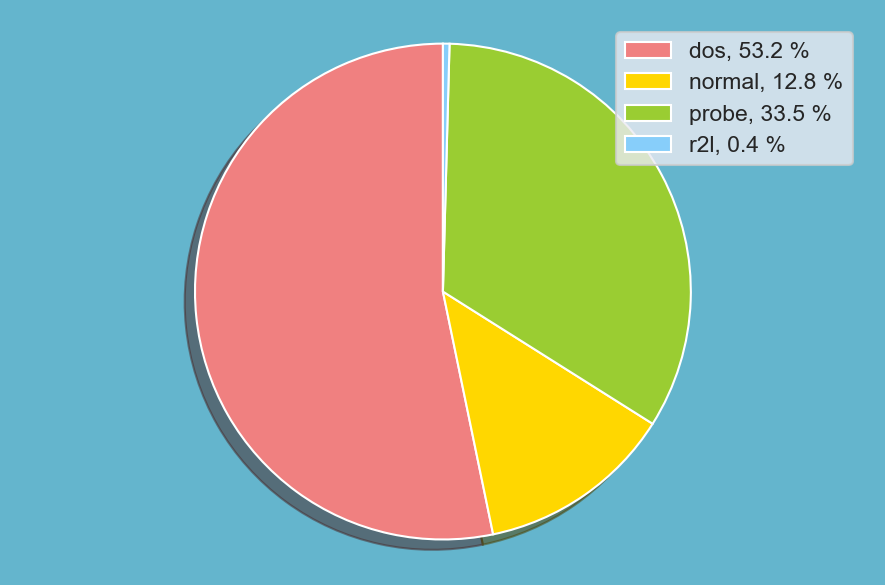

3 ['dos' 'normal' 'probe' 'r2l'] [1377  331  867   11]


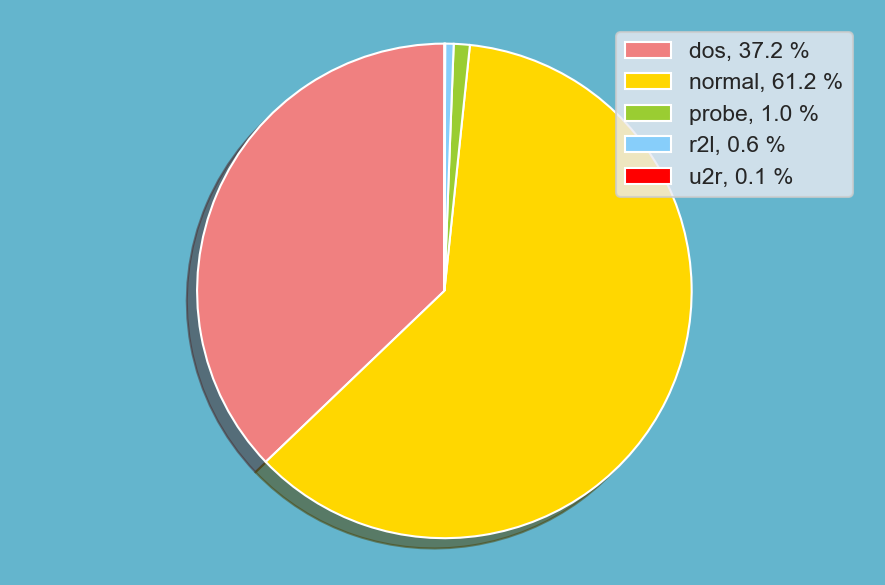

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 7348 12104   207   109    10]


0.597647811824946

In [13]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [14]:
dataSet = pd.read_csv("./../output_data/q-1-1_b_ReLU.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [15]:
K = 5

### GMM object creatition

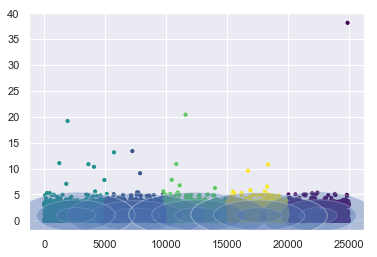

In [16]:
gmm = GaussianMixture(n_components = K, covariance_type='full', max_iter = 1000, random_state=42)
clusters = plot_gmm(gmm, X[:,0:2])

### Fitting the gmm object

In [17]:
clusters = gmm.fit(X).predict(X)
clusters

array([3, 4, 3, ..., 1, 3, 4])

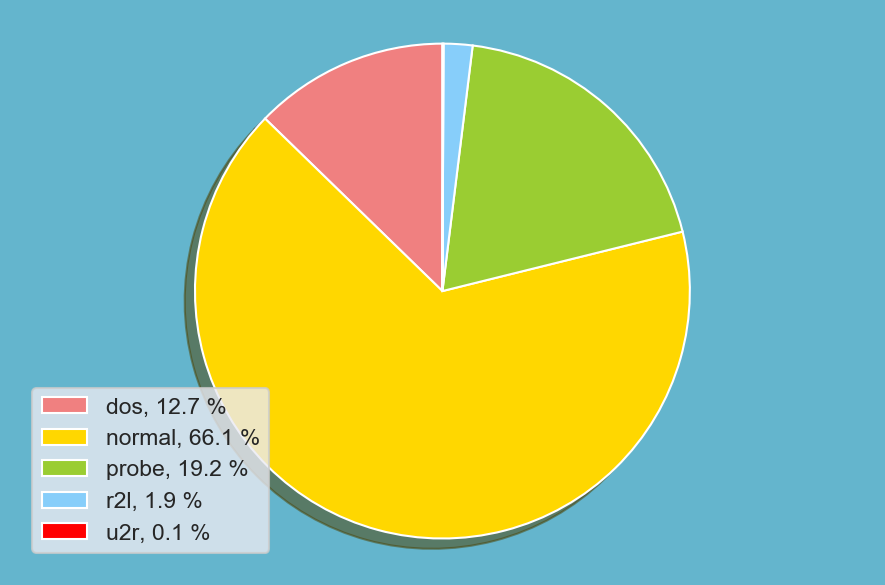

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 508 2641  766   75    3]


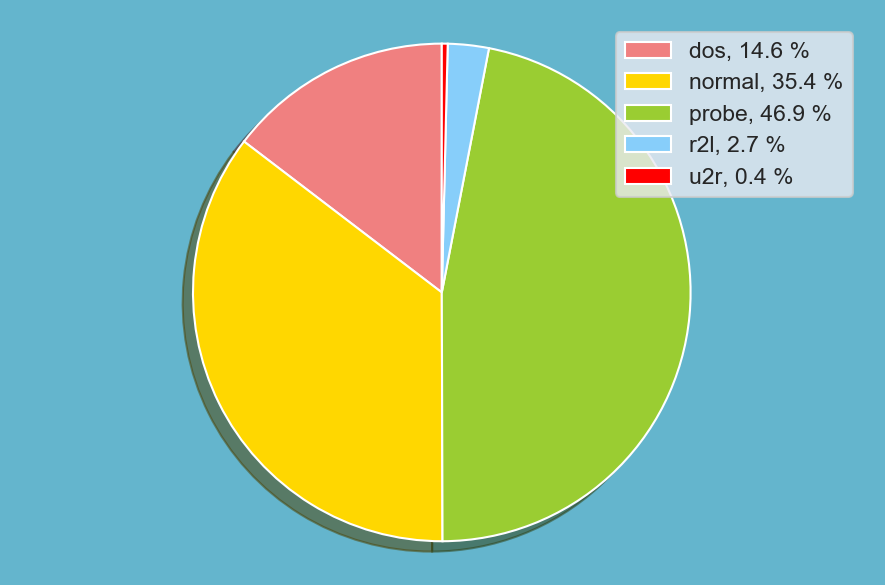

1 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [154 373 494  28   4]


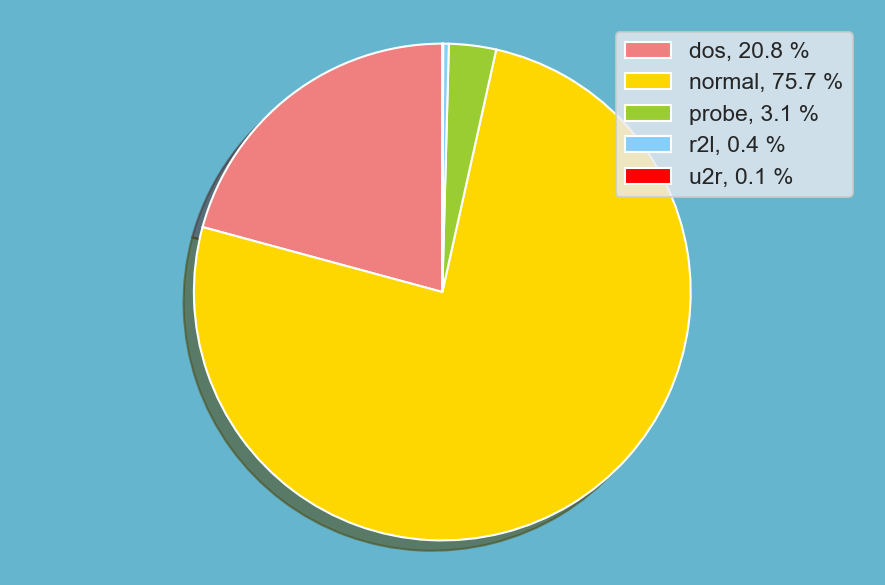

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 740 2696  109   13    2]


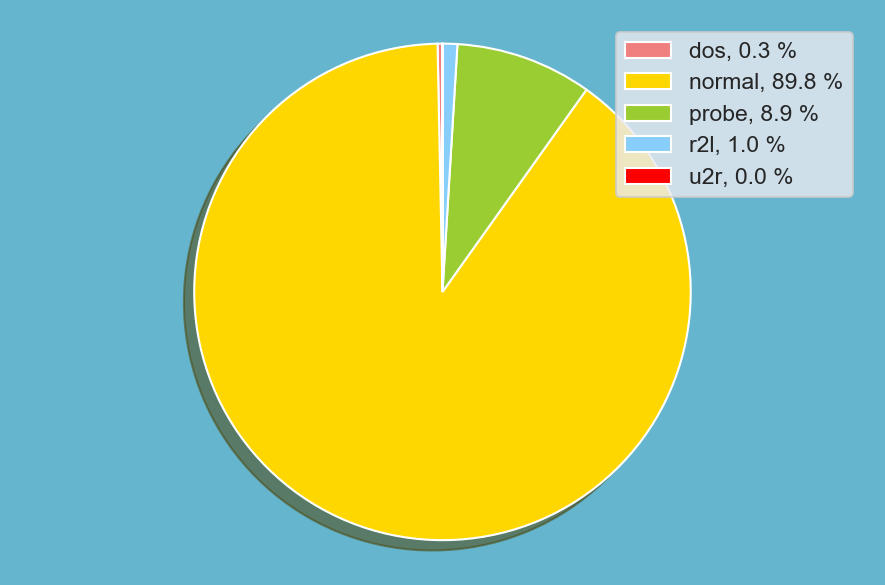

3 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [  27 7654  757   81    1]


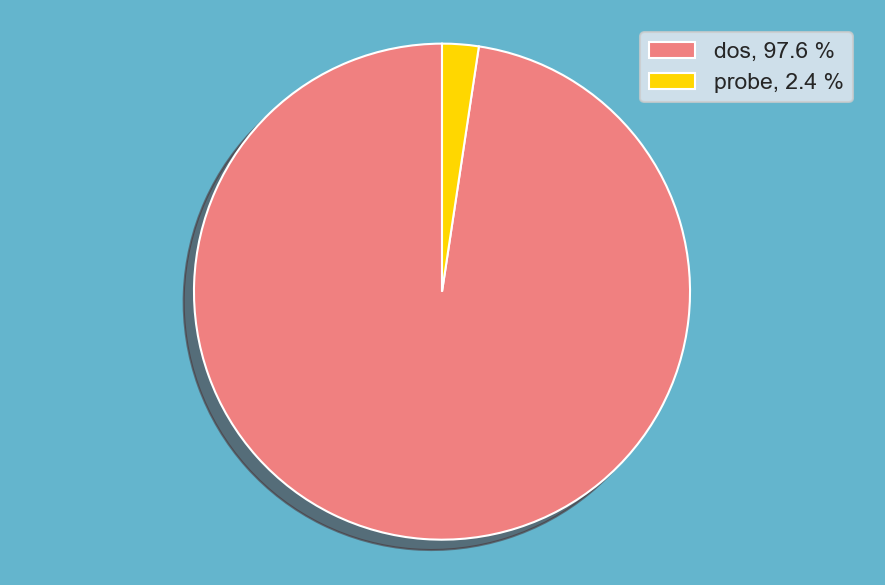

4 ['dos' 'probe'] [7685  187]


0.8468677494199536

In [18]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [19]:
dataSet = pd.read_csv("./../output_data/q-1-1_b_tanh.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [20]:
K = 5

### GMM object creatition

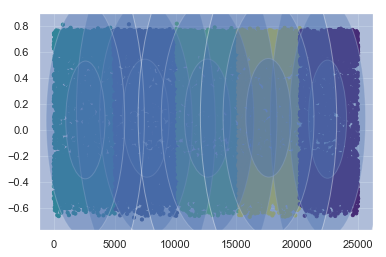

In [21]:
gmm = GaussianMixture(n_components = K, covariance_type='full', max_iter = 1000, random_state=42)
clusters = plot_gmm(gmm, X[:,0:2])

### Fitting the gmm object

In [22]:
clusters = gmm.fit(X).predict(X)
clusters

array([2, 0, 2, ..., 1, 4, 2])

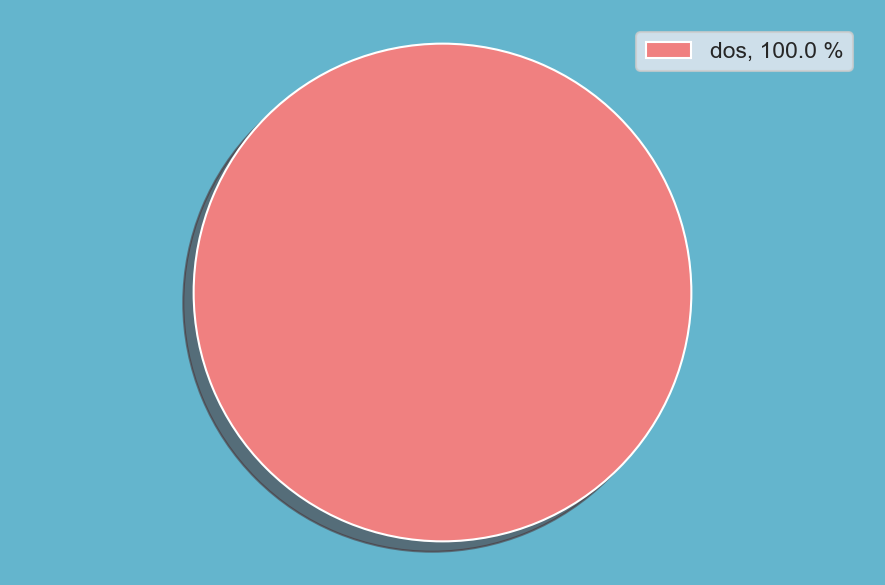

0 ['dos'] [1313]


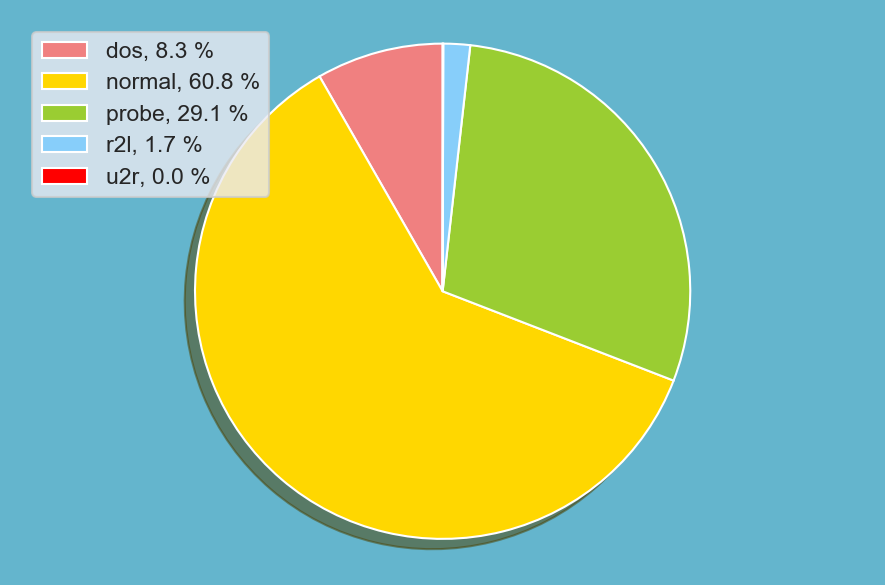

1 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 404 2968 1419   85    2]


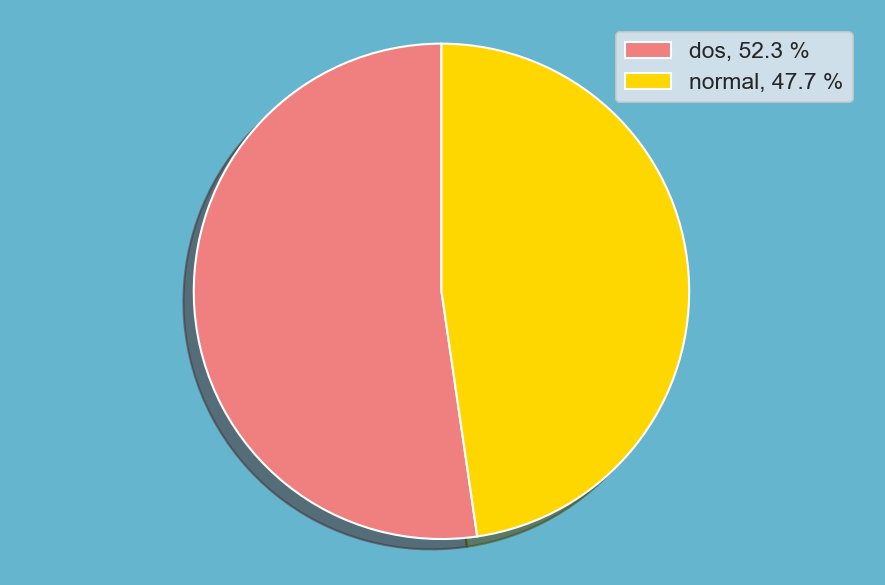

2 ['dos' 'normal'] [5792 5281]


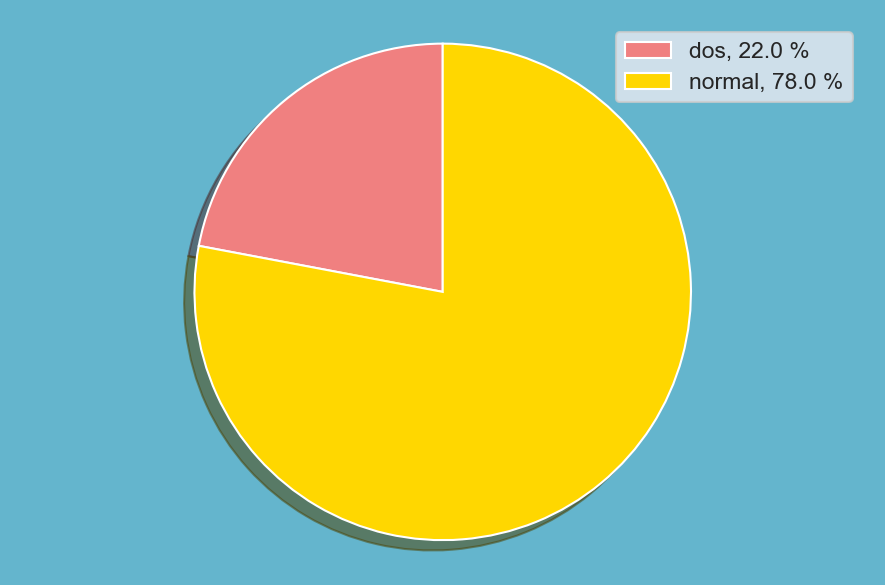

3 ['dos' 'normal'] [ 419 1483]


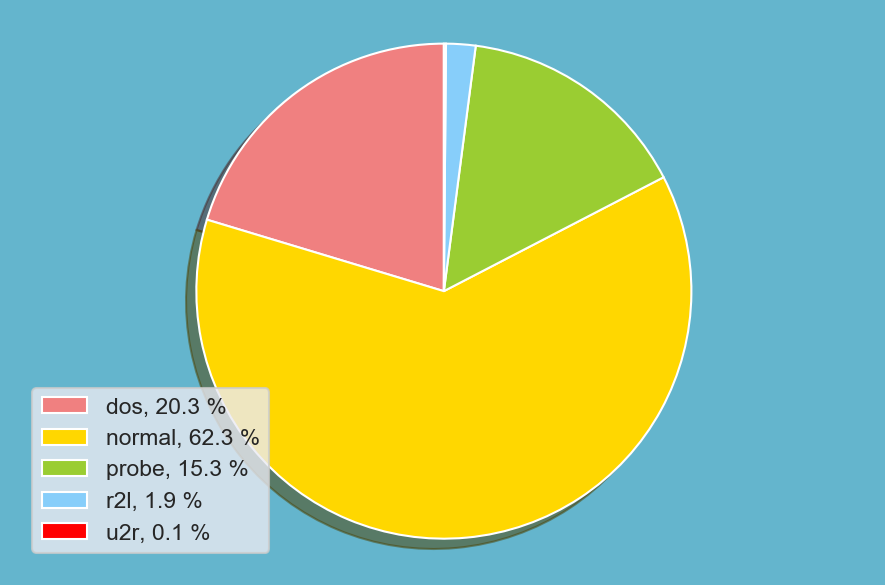

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1186 3632  894  112    8]


0.607568605488439

In [23]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity